# **Washington State Electric Vehicle Population Analysis**


## **Business Problem Definition**

The electric vehicle industry has been developing into a significant financial and commercial opportunity in these past few years. (Kapustin and Dmitry, 2020) Despite being invented earlier than the combustion engine, we are only recently seeing the proliferation of electrical vehicles disrupt the traditional gas car market. Through competition and innovation, the cost of battery production has decreased by more than 85% over the past ten years, closing the gap on EV production costs when compared to the production costs of traditional vehicles. (Rapson and Muehlegger, 2023) Not only that, owners of electric vehicles do not have to concern themselves with soaring and unstable gas prices (Kotek et al, 2020), which is appealing to the every day consumer. Increasing awareness on gas emissions and climate change has also meant changes in consumer purchasing habits as many begin to prefer greener alternatives. (Degirmenci and Breitner, 2017) All these factors and more combine to make electric vehicals a commercially viable and increasingly attractive alternative to gas cars.

 Electric car brands like Tesla are hence becoming extremely trendy cars with great mass appeal, but the market is continuing to expand still. More and more traditional car brands like BMW, Audi, and Ford are also now coming up with hybrid or fully electric models in an attempt to break into the electric vehicle industry and capture consumer attenion.

It is hence crucial to understand the broader electric vehicle landscape and where the current market stands. Our goal is to identify factors that determine popularity of electric vehicle brands and types in Washington state, and also gain more understanding into the historical trends regarding electric cars. We have broken down a few key factors we are interested in below:

* Analyze the distribution of BEVs and PHEVs across years
* Break down the model, make, and year of various electrical vehicles to determine popularity
* Examine the adoption of EVs across different legislative districts to inform policymakers
* Examine attributes of cars with Clean Alternative Fuel Vehicle eligbility
* Map out the distribution in electric vehicle electric range
* Investigate popularity of the different models and how this popularity may have changed over the years.



### **Motivation**

Our team is interested in the electric vehicle market as it is an environmentally friendly and cheaper option than gasoline cars. It is also an emerging technology that is exciting.

## **Report Summary**

In this report, we will take a exploratory look into the current electrical vehicle market in Washington State. We start off by summarizing the data cleaning steps we performed, before depicting the contents of the dataset with a few exploratory charts. After, we examined the relationship between individual variables within the dataset with a correlation matrix, which allowed us to identify pairs of related variables to take a deeper dive into. We then summarized our general findings, and offered our overall insights in our conclusion. Lastly, we have a list of references used in APA format.

## **Data Description and Data Source:**

This is a dataset of the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through the Washington State Department of Licensing (DOL) from April 19, 2019 to September 14, 2023, as reported by Washington State Department of Licensing. The source is [Data.WA.gov](https://data.wa.gov) - the general purpose open data portal for the State of Washington. Specifically, this dataset can be found at this line: https://catalog.data.gov/dataset/electric-vehicle-population-data

Additionally, we also made use of a shape file that contains the countys in Washington State for plotting purposes. The Shapefile was acquired from the Washington Geospatial Open Data Portal, accessible at the following link: https://geo.wa.gov/datasets/WADOH::countycases/about


### **Basic information**

There are 150483 rows with 17 columns.

**Data Dictionary:**


| Column | Type | Description |
|----------|----------|----------|
| VIN (1-10) | text | The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).
| County | text | This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington state may be located in other states.
|City|text|The city in which the registered owner resides.
|State|text|This is the geographic region of the country associated with the record. These addresses may be located in other states.
|Postal Code|Number|The 5 digit zip code in which the registered owner resides.
|Model Year|Number|The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
|Make|text|The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
|Model|text|The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
|Electric Vehicle Type|text|This distinguishes the vehicle as all electric or a plug-in hybrid.
|Clean Alternative Fuel Vehicle (CAFV) Eligibility|text|This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.
|Electric Range|Number|Describes how far a vehicle can travel purely on its electric charge.
|Base MSRP|Number|This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
|Legislative District|Number|The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
|DOL Vehicle ID|Number|Unique number assigned to each vehicle by Department of Licensing for identification purposes.
|Vehicle Location|text|The center of the ZIP Code for the registered vehicle.
|Electric Utility|text|This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative.<br> If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe `\|` delimits utilities of same TYPE and a double pipe `\|\|` delimits utilities of different types. <br> The Washington State Department of Licensing (DOL) combined vehicle address and Homeland Infrastructure Foundation Level Database [HIFLD](https://gii.dhs.gov/HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. <br> Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.
|2020 Census Tract|Number|The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID). <br> More information can be found here: [United States Census Bureau](https://www.census.gov/programs-surveys/geography/about/glossary.html#par_textimage_13)

## **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = '/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv'
ev_wa_data = pd.read_csv(data)

Mounted at /content/drive


Amount of Missing Values

In [ ]:
df_nulls = pd.DataFrame(ev_wa_data.isnull().sum())
df_nulls.reset_index(inplace=True)
df_nulls.columns = ['Lables', 'Null values']
df_nulls

,Lables,Null values
0,VIN (1-10),0
1,County,3
2,City,3
3,State,0
4,Postal Code,3
5,Model Year,0
6,Make,0
7,Model,0
8,Electric Vehicle Type,0
9,Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df_nulls['Percentage of Null values'] = df_nulls['Null values'].apply(lambda x : round(((x/ev_wa_data.shape[0])*100),3))
df_nulls

,Lables,Null values,Percentage of Null values
0,VIN (1-10),0,0.000
1,County,3,0.002
2,City,3,0.002
3,State,0,0.000
4,Postal Code,3,0.002
5,Model Year,0,0.000
6,Make,0,0.000
7,Model,0,0.000
8,Electric Vehicle Type,0,0.000
9,Clean Alternative Fuel Vehicle (CAFV) Eligibility,0,0.000


As the percentage of Null values in labels is a very small proportion of the total dataset (less than 5%), we will move forward by removing those rows from our analysis.

In [ ]:
Numeric_col  = ev_wa_data.select_dtypes(include='int')
for column in Numeric_col:
  print(column, Numeric_col[Numeric_col[column]==0].shape[0]), print(((Numeric_col[Numeric_col[column]==0].shape[0]/ev_wa_data.shape[0])*100))

Model Year 0
0.0
Electric Range 69698
46.316502970454934
Base MSRP 147027
97.70404433752874
DOL Vehicle ID 0
0.0


Upon further exploration, more than 97% of the Base MSRP data is not available. Hence, we will remove the column for now. We will also remove "2020 Census Tract" as it contains no information important to our project now.

In [ ]:
ev_wa_data = ev_wa_data.drop(columns=["Base MSRP", "2020 Census Tract"])
ev_wa_data.replace({'': np.nan, 0: np.nan}, inplace=True)
ev_wa_data=ev_wa_data.dropna()
ev_wa_data = ev_wa_data[ev_wa_data["State"] == 'WA']
ev_wa_data = ev_wa_data[ev_wa_data["Electric Range"] != 0]

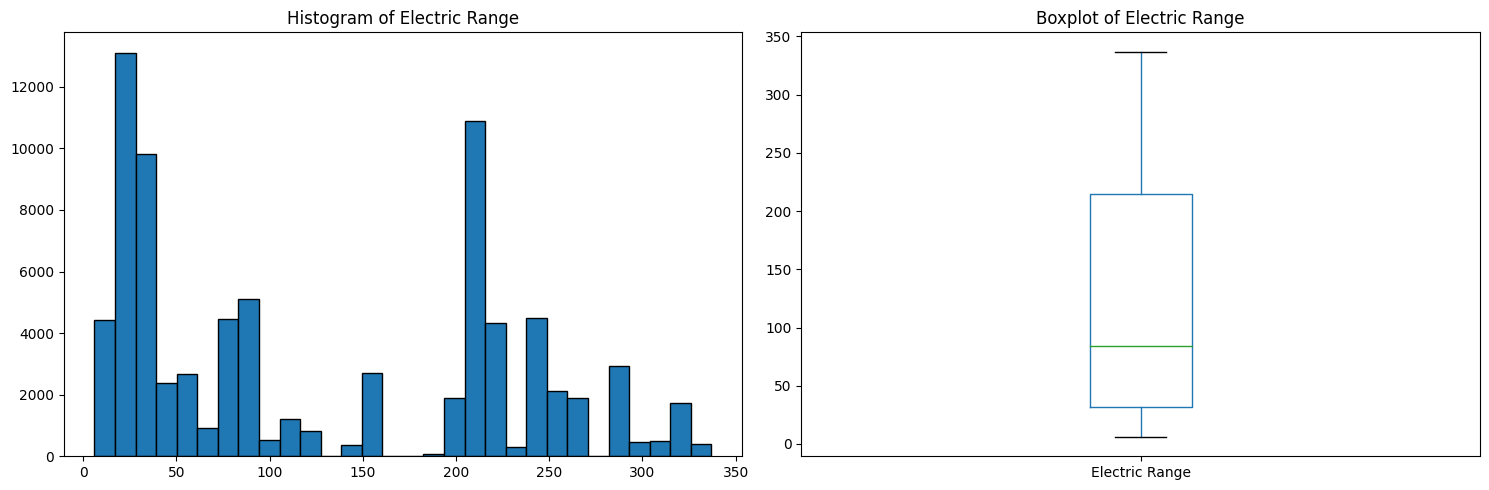

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
ev_wa_data['Electric Range'].hist(bins=30,edgecolor='black',grid=False)
plt.title("Histogram of Electric Range")

plt.subplot(1, 2, 2)
ev_wa_data.boxplot(column='Electric Range',grid=False)
plt.title("Boxplot of Electric Range")

plt.tight_layout()
plt.show()

Certain columns had incorrect dtypes for the information they contained, so we will go ahead and change them.

In [ ]:
new_dtypes = {'VIN (1-10)': 'string',
              'County': 'category',
              'City' :'category',
              'State':'category',
              'Make': 'category',
              'Model':'string',
              'Legislative District': 'int',
              'Electric Vehicle Type':'category',
              'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'category',
              'Vehicle Location': 'string',
              'Electric Utility': 'string'
              }
ev_wa_data = ev_wa_data.astype(new_dtypes)
print(ev_wa_data.dtypes)
print(ev_wa_data.head())

VIN (1-10)                                             string
County                                               category
City                                                 category
State                                                category
Postal Code                                           float64
Model Year                                              int64
Make                                                 category
Model                                                  string
Electric Vehicle Type                                category
Clean Alternative Fuel Vehicle (CAFV) Eligibility    category
Electric Range                                        float64
Legislative District                                    int64
DOL Vehicle ID                                          int64
Vehicle Location                                       string
Electric Utility                                       string
dtype: object
   VIN (1-10)    County      City State  Postal Code  Mo

## **Data Exploration and Visualization**

#### What is the distribution of  electric vehicles in Washington State by year?

To start our exploration, we wanted a big picture overview on which model years were the most popular in Washington State.

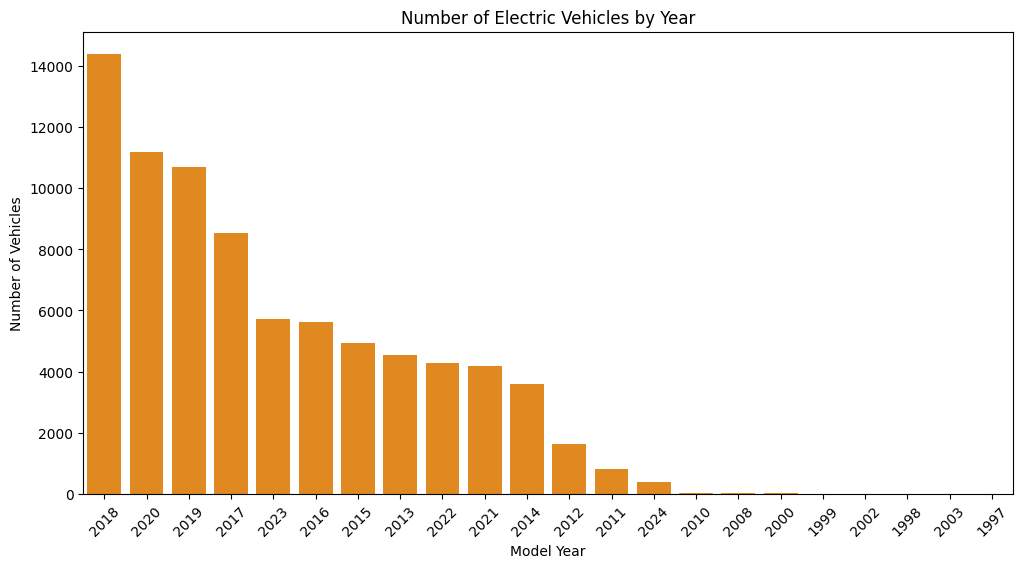

In [ ]:
#Note that to give a clear overview, the data here is sorted by descending order, not chronological order, to give sense of which years are most popular

plt.figure(figsize=(12, 6))
sns.countplot(data=ev_wa_data, x='Model Year', order=ev_wa_data['Model Year'].value_counts().astype(int).index, color='darkorange');
plt.xticks(rotation=45)
plt.title("Number of Electric Vehicles by Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show();

This chart showcases which years had the most popular models. The y-axis shows the total number of vehicles, while the x-axis reflects the year. The x-axis is arranged in descending order of the respective counts for each year, showing the year with the most amount of cars first. From here, we can tell that 2018 saw a huge boom, and that their models are still the most commonly used electric cars in Washington 5 years on. Notably, this occurs right before the 2020 COVID-19 pandemic, which caused widespread disruption in car manufacturing supply chains. (Boranova et al, 2022) This might help explain the poor performance of car totals from 2020 on.

#### What is the distribution of  electric vehicles in Washington State by type over the years?

Afterwards, we wanted to see the data chronologically, but split by electric vehicle type to see the distribution of EV types throughout the years. Our data set examines two types of electric vehicles, Battery Electric Vehicles (BEVs) which are fully electric, and Plug-in Hybrid Electric Vehicles (PHEVs) which are hybrid cars that can run both gas and electric.

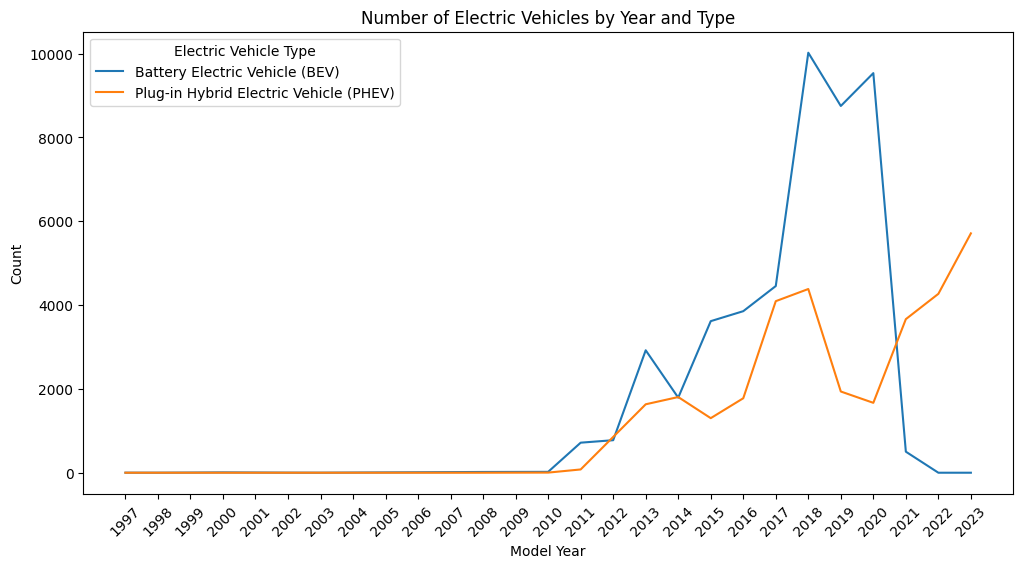

In [ ]:
count_df = ev_wa_data.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='Count')
count_df = count_df[count_df["Model Year"] != 2024]

plt.figure(figsize=(12, 6))
evt_dist_chart = sns.lineplot(data=count_df, x='Model Year', y='Count', hue='Electric Vehicle Type');

plt.title("Number of Electric Vehicles by Year and Type")
plt.xticks(rotation=45)
evt_dist_chart.set_xticks(range(1997, 2024), labels=range(1997, 2024))
evt_dist_chart.set_xlabel("Model Year")
evt_dist_chart.legend(title="Electric Vehicle Type")

plt.show();

Here, we can see that BEVs and PHEVs have been performing relatively closely all the way up to 2017, altho PHEVs tend to slightly underperform compared to BEVs. In 2018, however, the number of BEVs shot up exponentially, drastically outperforming the number of PHEVs in use. This is likely because Tesla introduced the Model 3 shortly beforehand in July 2017. The Tesla Model 3 was widely popular as it brought electric vehicle prices down, and as we will see in the upcoming chart, remains the most used electric vehicle model today.

This growth in BEVs was sustained until 2020, where BEV saw a large drop in numbers. As earlier examined, this can likely be attributed to the pandemic, when customers tightened wallets and car production supply chains were disrupted. We hypothesize that this likely lead to a weakening in demand and a shrinking of the market. We are seeing a stablization and rebound from this dip for PHEVs, however, BEV performance remains weak. As new models are eventually released, there is hope that BEV numbers will trend upwards eventually again.

#### What does the overall market look like in Washington State?

What are the most popular model and makes of electric cars in Washington? Seeing the distribution of BEVs and PHEVs made us wonder about how the different industry players are actually performing in the car market in Washington. To do this, we used a series of bar charts.

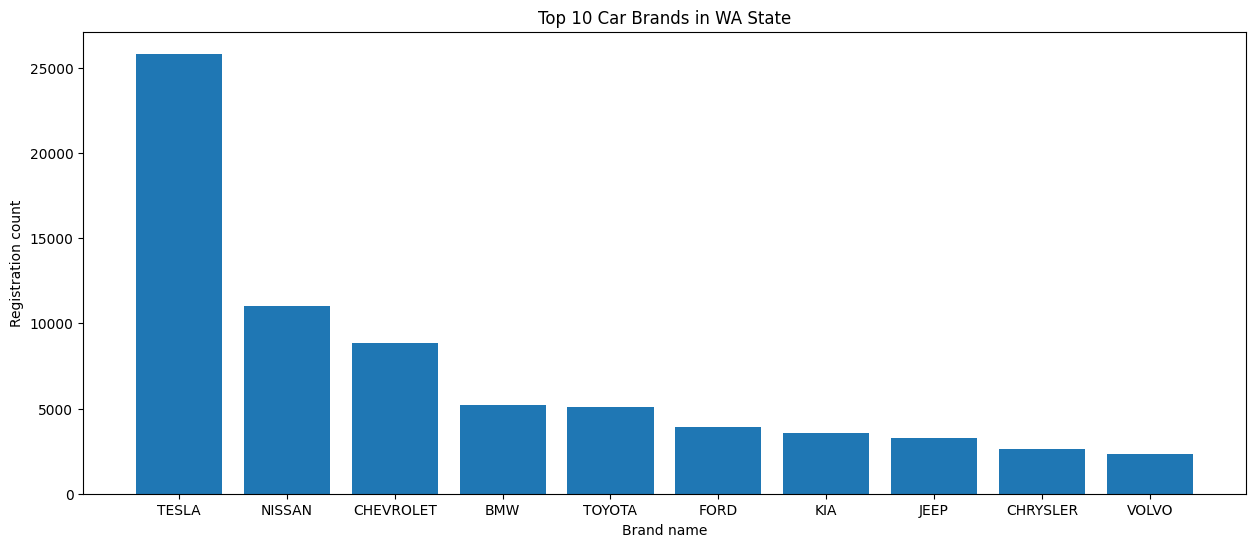

In [ ]:
#Overall top 10 performing car brands in WA state

plt.figure(figsize=(15, 6))
data_top10=ev_wa_data['Make'].value_counts().head(10)
plt.bar(data_top10.index,data_top10.values)
plt.title('Top 10 Car Brands in WA State')
plt.xlabel('Brand name')
plt.ylabel('Registration count')
plt.show()

tesla_data_WA = ev_wa_data[ev_wa_data['Make'] == 'TESLA']
tesla_model = tesla_data_WA['Model'].value_counts().head(4)

nissan_data_WA = ev_wa_data[ev_wa_data['Make'] == 'NISSAN']
nissan_model = nissan_data_WA['Model'].value_counts().head(2)

chevrolet_data_WA = ev_wa_data[ev_wa_data['Make'] == 'CHEVROLET']
chevrolet_model = chevrolet_data_WA['Model'].value_counts().head(4)

From the above chart, we can clearly see that Tesla is the most popular brand of EV currently in use in Washington State, followed by Nissan, and then Chevrolet.

#### How has the popularity of these top 10 brands changed over the years?

After looking at the overall popularity, we wanted to observe how the popularity of different brands may have changed over the years. To do this, we used a line chart:

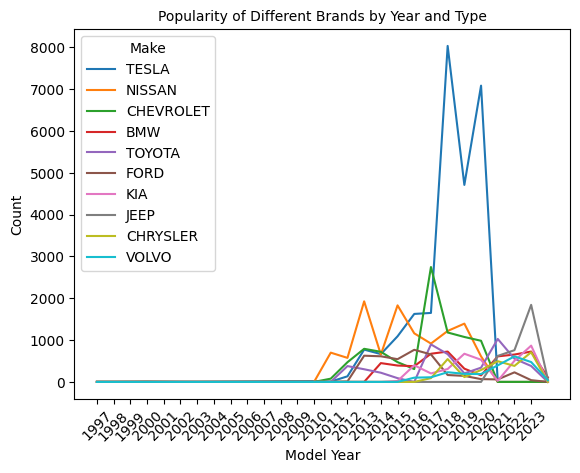

In [ ]:
#Reorganizing the data to isolate performance of top 10 brands

top10makes = ev_wa_data.groupby("Make").size().sort_values(ascending=False)[:10]
top10makes = top10makes.index.tolist()

df = ev_wa_data[["Model Year", "Make"]]
df = df.groupby(["Model Year", "Make"]).size().reset_index(name="Count")
df = df[df["Make"].isin(top10makes)]

makes_over_years = sns.lineplot(data=df, x='Model Year', y='Count', hue='Make', hue_order=top10makes);

plt.title("Popularity of Different Brands by Year and Type", size=10)
plt.xticks(rotation=45)
makes_over_years.set_xticks(range(1997, 2024), labels=range(1997, 2024))
makes_over_years.set_xlabel("Model Year")

plt.show();

From this chart, we can see that Tesla had a huge explosion in popularity in the late 2010s. However, their popularity stalled after 2021. We hypothesize that perhaps Tesla has hit maximum penetration rate in the market, where everyone who wanted to purchase a Tesla already did so during it's first boom of popularity in the late 2010s. And as Teslas are built to last for many years, those cars are still in active circulation. Perhaps there will be another boom in the future as these cars are retired by their owners and replaced by newer models.

#### How many models does each make have in the market?

After seeing an overlook of all the brands, we wondered how many models each brand has. To do this, we took a closer look with a bar chart:

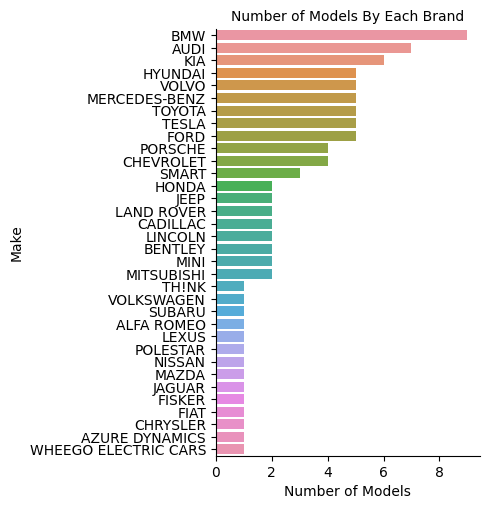

In [ ]:
make_model_counts = ev_wa_data.groupby('Make')['Model'].nunique().reset_index().sort_values(by="Model", ascending=False)
sns.catplot(y="Make", x="Model", data=make_model_counts, kind="bar", order=make_model_counts["Make"]).set_xlabels("Number of Models");
plt.title("Number of Models By Each Brand", size=10);

Interestingly, BMW takes the lead among all makes as the brand with the most models. Other luxury brands also performed highly in this chart, showing a pivot in focus in luxury manufacturers to manufacturing more hybrid options as well. However, as we can see from previous charts, this does not equate necessarily to a stronger market position in the overall EV industry. This is likely as consumers of luxury cars may have less of an environmental focus, making these offerings less attractive to them. The high price of these vehicles likely also mean the luxury car consumers base is smaller than the general mass market car consumer base as a whole, so less luxury cars overall are purchased.

#### What are the most popular models for the top 5 performing makes?

Continuing to investigate the models of brands, we wanted to know which models were the best performing models for the top 5 EV brands in use in Washington State.

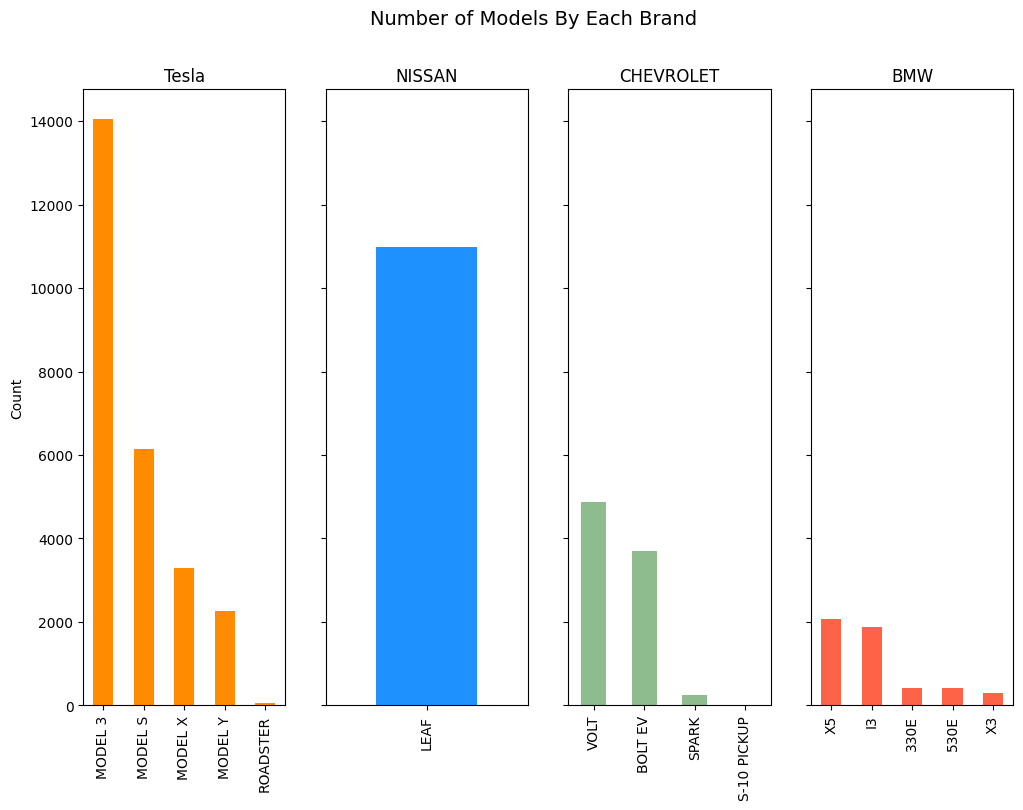

In [ ]:
tesla_data_WA = ev_wa_data[ev_wa_data['Make'] == 'TESLA']
tesla_model = tesla_data_WA['Model'].value_counts().head(5)

nissan_data_WA = ev_wa_data[ev_wa_data['Make'] == 'NISSAN']
nissan_model = nissan_data_WA['Model'].value_counts().head(2)

chevrolet_data_WA = ev_wa_data[ev_wa_data['Make'] == 'CHEVROLET']
chevrolet_model = chevrolet_data_WA['Model'].value_counts().head(5)

bmw_data_WA = ev_wa_data[ev_wa_data['Make'] == 'BMW']
bmw_model = bmw_data_WA['Model'].value_counts().head(5)

fig, ax = plt.subplots(1, 4, figsize=(12, 8), sharey=True)

tesla_model.plot(kind='bar', color='darkorange', ax=ax[0])
ax[0].set_title('Tesla')
ax[0].set_ylabel('Count')

nissan_model.plot(kind='bar', color='dodgerblue', ax=ax[1])
ax[1].set_title('NISSAN')
ax[1].set_ylabel('Count')

chevrolet_model.plot(kind='bar', color='darkseagreen', ax=ax[2])
ax[2].set_title('CHEVROLET')
ax[2].set_ylabel('Count')

bmw_model.plot(kind ='bar', color ='tomato', ax=ax[3])
ax[3].set_title('BMW')
ax[3].set_ylabel('Count')

fig.suptitle("Number of Models By Each Brand", fontsize=14)

plt.show()

For the models, we chose to only highlight the top 5 models from the top 4 brands as the other models by these brands had numbers small enough where they were not appearing on the chart. However, since Nissan only has 2 model types, which are ARIYA and LEAF. Since the ARIYA had 0 electric range, we had removed rows of this model in earlier data cleaning steps, and hence, we only see LEAF type of Nissan.

Out of all the models, the Tesla Model 3 is the most popular option, with aligns with the analysis done. However, we can see that the Nissan LEAF is a strong competitor to Tesla as well. However, since Nissan only has one model of car and Tesla has 5, Tesla still retains an overall lead in the industry.

Chevrolet is also performing strongly as a traditonal car manufacturer as despite only having 4 models, overall sales and performance still comes in at 3rd place in Washington State. Comparatively, BMW, which has many more model types available, is performing worse than Chevrolet in 4th place. An interesting insight here from the BMW subplot is that 4 out of the 5 top performing models were already popular models that existed originally as a fully gas-powered car before a hybrid option began to be offered by BMW.

 #### What's the geographical distribution of all electric vehicles in Washington State by countys?

After investigating the models of the cars, we wanted to know how the overall count of EVs were distributed geographically in Washington State. To do this, we plotted a geographical heat map.

In [ ]:
!pip install geopandas
!pip install mapclassify
import geopandas as gpd

In [ ]:
# Here, we load the map to see what we are working with
custom=gpd.read_file('/content/drive/MyDrive/CountyCases.zip')

Map = ev_wa_data[['County','VIN (1-10)']].groupby('County').count().sort_values(by='VIN (1-10)',ascending=False)
Map.columns
Map.rename(columns={'VIN (1-10)':'Values'}, inplace=True)
Map.reset_index(inplace=True)

custom = custom.merge(Map,left_on='CNTY_NAME',right_on='County',how='outer')

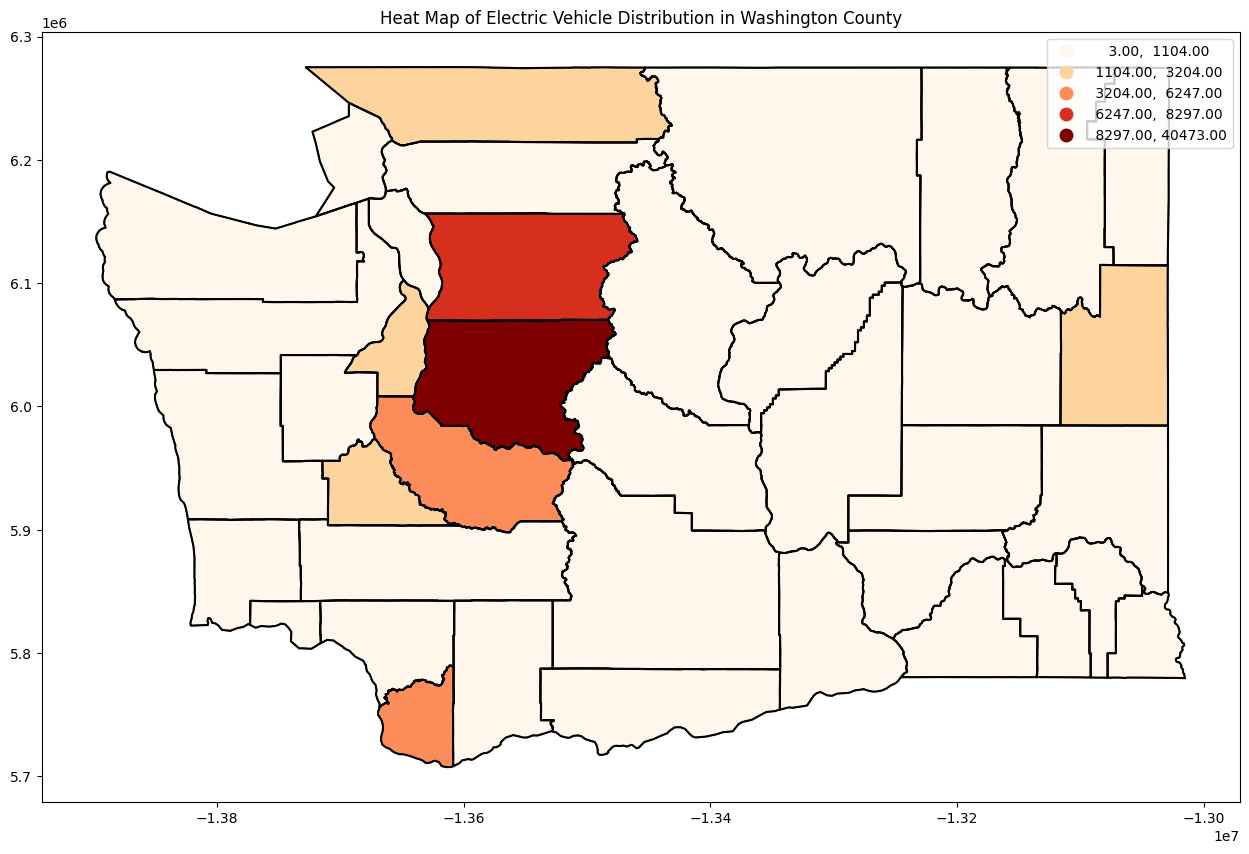

In [ ]:
base=custom.boundary.plot(figsize=(20,10),edgecolor='black')
custom.plot(ax=base,column='Values',figsize=(20,10),scheme="natural_breaks",legend=True,edgecolor="k",missing_kwds={'color': 'lightgrey'},cmap='OrRd')

plt.title("Heat Map of Electric Vehicle Distribution in Washington County");

The provided figure depicts a geoplot of Washington State, generated using the Python library Geopandas and utilizing a Shapefile, which is geospatial vector data employed for visualization purposes.

The Shapefile was acquired from the Washington Geospatial Open Data Portal, accessible at the following link: https://geo.wa.gov/datasets/WADOH::countycases/about

This plot illustrates the counties within the geographical regions of Washington State.

The darker shade represents higher number of electric vehicles. Similarly, lighter shade represents lower number of electric vehicles.

From here, we can see that Kings county has the highest concentration of electric vehicles in all of Washington. This makes sense as secondary research informs us that Kings county having the greatest population of all Washington counties. Seattle, a major urban center, is also located in Kings county.

Clark and Snohomish counties closely follow King County in terms of electric vehicle numbers, while Pierce, Thurston, and Kitsap counties exhibit comparable figures.

It is noteworthy that counties with greater financial resources tend to possess a larger number of electric vehicles. The relatively high initial cost can serve as a deterrent for individuals in other counties, limiting their access to electric vehicles.

To promote wider adoption of electric vehicles in these regions, government initiatives such as subsidies should be considered. Such measures can make electric vehicles more affordable for the majority of residents, contributing to climate preservation and offering potential cost savings through reduced expenses related to pollution mitigation.

#### How are the 2 different EV types distributed in Washington State's different legislative districts?

After examining the counties, we wanted to dived deeper and see how the types of electric vehicles were distributed in each legislative district as well.

To examine how they are distributed in each legislative district, we plotted a bar chart to give us an overview.

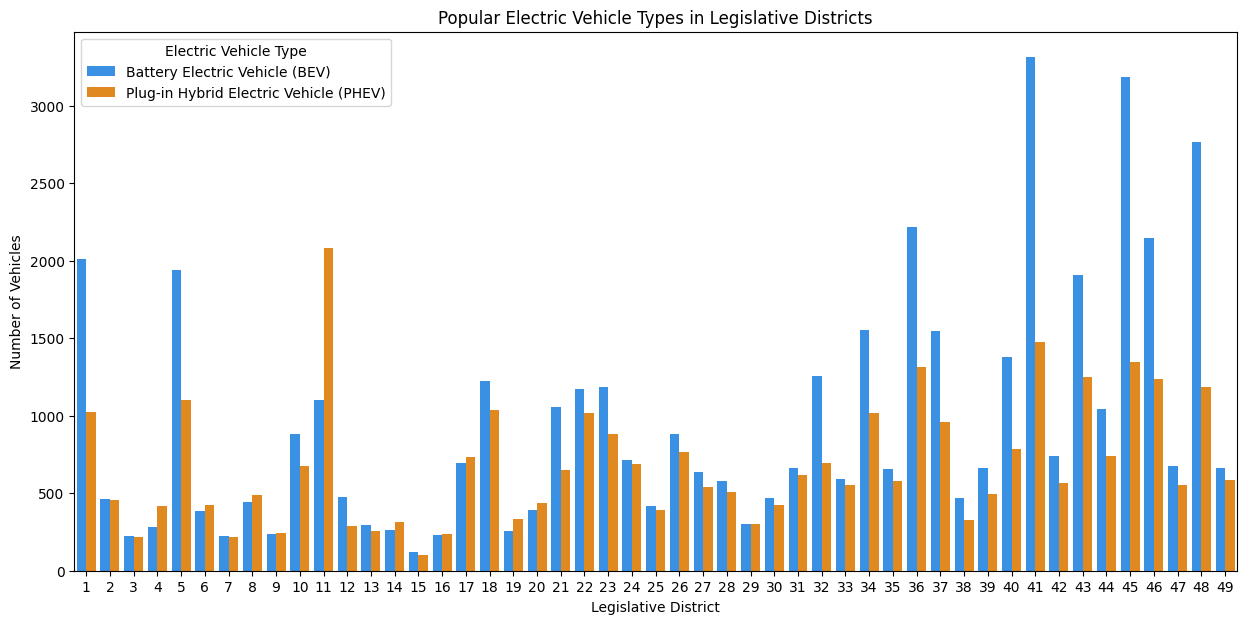

In [ ]:
grouped_data = ev_wa_data.groupby(['Legislative District', 'Electric Vehicle Type']).size().reset_index(name='counts')
plt.figure(figsize=(15,7))
sns.barplot(x='Legislative District', y='counts', hue='Electric Vehicle Type', data=grouped_data, palette=['dodgerblue', 'darkorange'])
plt.title('Popular Electric Vehicle Types in Legislative Districts')
plt.xlabel('Legislative District')
plt.ylabel('Number of Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.show()

The graph above depicts the distribution of hybrid and electric automobiles across several districts. The x-axis depicts the various districts, while the y-axis reflects the number of cars. Two sets of bars indicate hybrid and electric automobiles, allowing for a simple comparison of vehicle numbers for each type within each district. District 11 shows a notable peak in PHEVs

#### Is there a preference for a certain type of EV in different legislative districts?

After looking at the overall performance of each type of EV in each legislative district, we wanted to see if specific districts had a preference for BEVs or PHEVs. To do this, we plotted the differences between the two types of EVs.

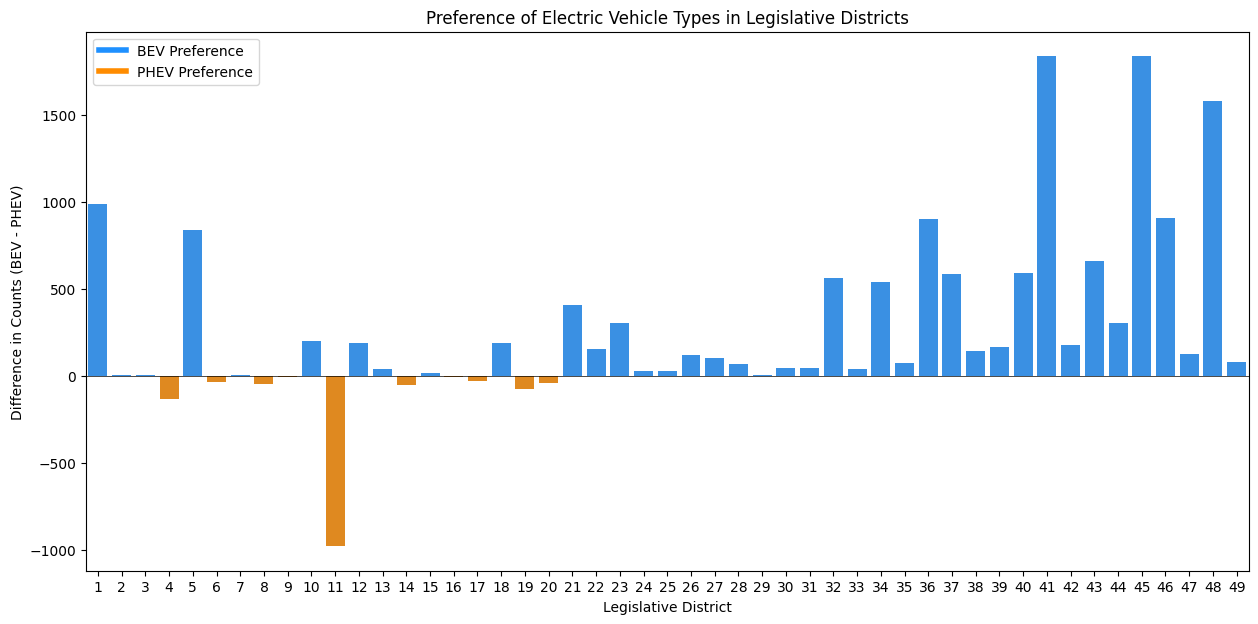

In [ ]:
bev_data = grouped_data[grouped_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'].set_index('Legislative District')
phev_data = grouped_data[grouped_data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].set_index('Legislative District')

difference = bev_data['counts'] - phev_data['counts']

plt.figure(figsize=(15, 7))

colors = ['dodgerblue' if val > 0 else 'darkorange' for val in difference]
diff_plot = sns.barplot(x=difference.index, y=difference.values, palette=colors)

plt.xlabel('Legislative District')
plt.ylabel('Difference in Counts (BEV - PHEV)')
plt.title('Preference of Electric Vehicle Types in Legislative Districts')
plt.axhline(0, color='black',linewidth=0.5)

plt.xticks(rotation=0)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='dodgerblue', lw=4, label='BEV Preference'),
                   Line2D([0], [0], color='darkorange', lw=4, label='PHEV Preference')]
diff_plot.legend(handles=legend_elements, loc='upper left')

plt.show()

The graph above showcases the varying preferences for Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across 49 legislative districts. A majority of these districts display a clear inclination towards BEVs, with districts 1, 2, 23, and 35 to 49 exhibiting pronounced differences in favor of BEVs. However, district 11 stands out with a significant preference for PHEVs. While most regions lean towards BEVs, several districts exhibit a balanced adoption of both vehicle types, highlighting the diverse and multifaceted nature of electric vehicle adoption across different regions.

Generally speaking, Battery Electric Vehicles (BEVs) exhibit a larger population than Plug-in Hybrid Electric Vehicles (PHEVs). Certain areas, however, diverge from this overall trend, displaying a notable discrepancy in which the proportion of PHEVs outnumbers that of BEVs. Several hypothesized causal mechanisms might explain these observed variations:

1. Infrastructure: Districts with a higher concentration of hybrid vehicles may have insufficient charging infrastructure, making electric vehicles less practicable.

2. Policy and Incentives: Areas with a higher proportion of hybrid vehicles may lack adequate policies and incentives (such as tax credits, rebates, and grants) to stimulate the adoption of electric vehicles.

3. Consumer Preferences: Cultural and societal considerations may have an impact on vehicle selection. Because of their familiarity and the flexibility of having a gasoline option, certain communities may choose hybrid automobiles.

4. Economic gaps: Economic gaps across districts may effect citizens' capacity to acquire electric vehicles, which might be more expensive upfront despite possible long-term savings.


5. Model Availability: The availability of many car models, particularly those catering to specialized demands (such as trucks or bigger vehicles), may be limited in electric forms, prompting buyers to choose for hybrid versions instead.

6. Environmental consciousness: Districts with a higher level of environmental consciousness may see more adoption of electric cars, which are frequently seen as more environmentally benign than hybrid equivalents.

7. Range Anxiety: Electric vehicles, particularly older or less expensive ones, may have shorter travel ranges than hybrid vehicles, which may be a disincentive in districts with larger typical commute distances.

8. Energy Sources: Individuals may prefer hybrid automobiles as a little greener choice in locations where the electrical grid is predominantly fueled by nonrenewable resources.

#### What electric utilities companies are the most commonly used?

We wanted an overview on which electric utility providers are the most commonly used by those with EVs, as it can inform legislators on who to contact to expand EV infrastructure and support. To do so, we plotted a bar chart.

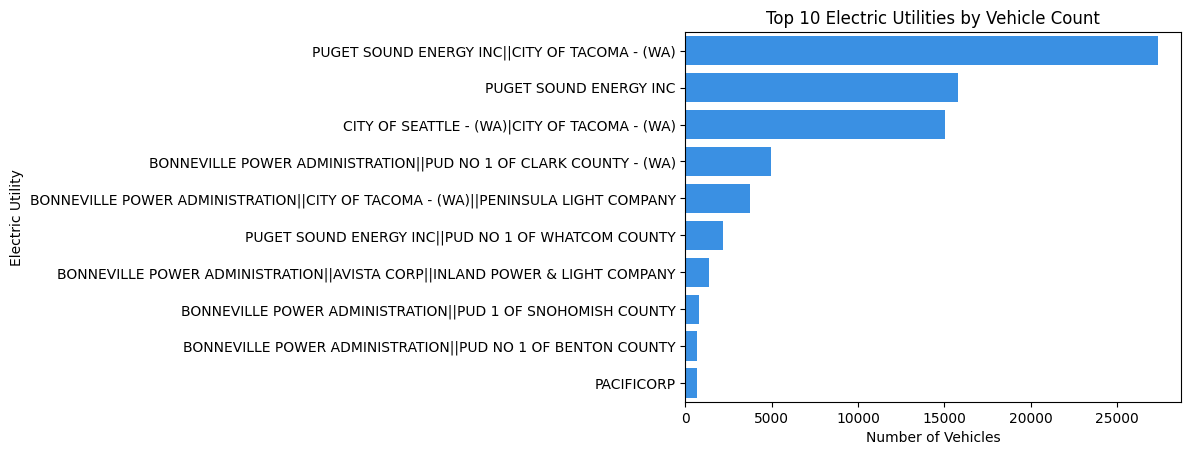

In [ ]:
utilities = ev_wa_data['Electric Utility']

top_10_utilities = utilities.value_counts().nlargest(10)

sns.barplot(y=top_10_utilities.index, x=top_10_utilities.values,color="dodgerblue")
plt.title('Top 10 Electric Utilities by Vehicle Count')
plt.xlabel('Number of Vehicles')
plt.ylabel('Electric Utility')
plt.show()

From the above charts, we can see that Puget Sound Energy and Bonneville Power Administration were the most popular electrical utility companies used by EV owners. This may be insightful to legislators, who can contact these companies for insight on what would be the most useful next steps in expanding the EV network, especially when perhaps considering future building of charging stations as well.

#### How do the different features interact with and affect each other?

After performing more exploratory analysis, we wanted to get a more in depth view of how our different variables in the data set may interact and affect other variables. To get an overview of these, we created a correlation heat map matrix.

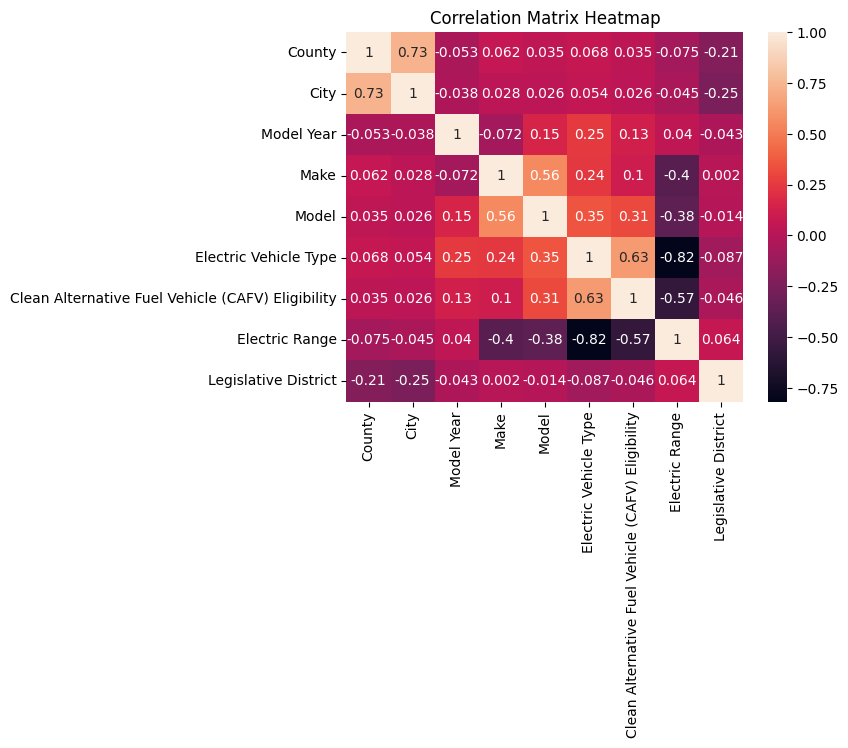

In [ ]:
corr_matrix_data = ev_wa_data

corr_matrix_data = corr_matrix_data.drop(columns=["VIN (1-10)", "State", "Postal Code", "DOL Vehicle ID", "Vehicle Location", "Electric Utility"])

for col in corr_matrix_data.columns:
  if corr_matrix_data[col].dtypes in ["category", "string"]:
    codes, uniques = pd.factorize(corr_matrix_data[col])
    corr_matrix_data[col] = codes

correlation_matrix = corr_matrix_data.corr()

sns.heatmap(data=correlation_matrix, annot=True)
plt.title("Correlation Matrix Heatmap");

From the above matrix, we can see that certain variables have a very high level of correlation, like electric range and electric vehicle type. We will further explore this pair of variables and more below.

#### Relationship between electric range and electric vehicle type through the years

First, we decided to dive deep into the relationship between different electric vehicle types and their corresponding electric ranges, specifically about how these ranges may have changed through the years. To examine this, we plotted a scatterplot and a linear regression plot for comparison.

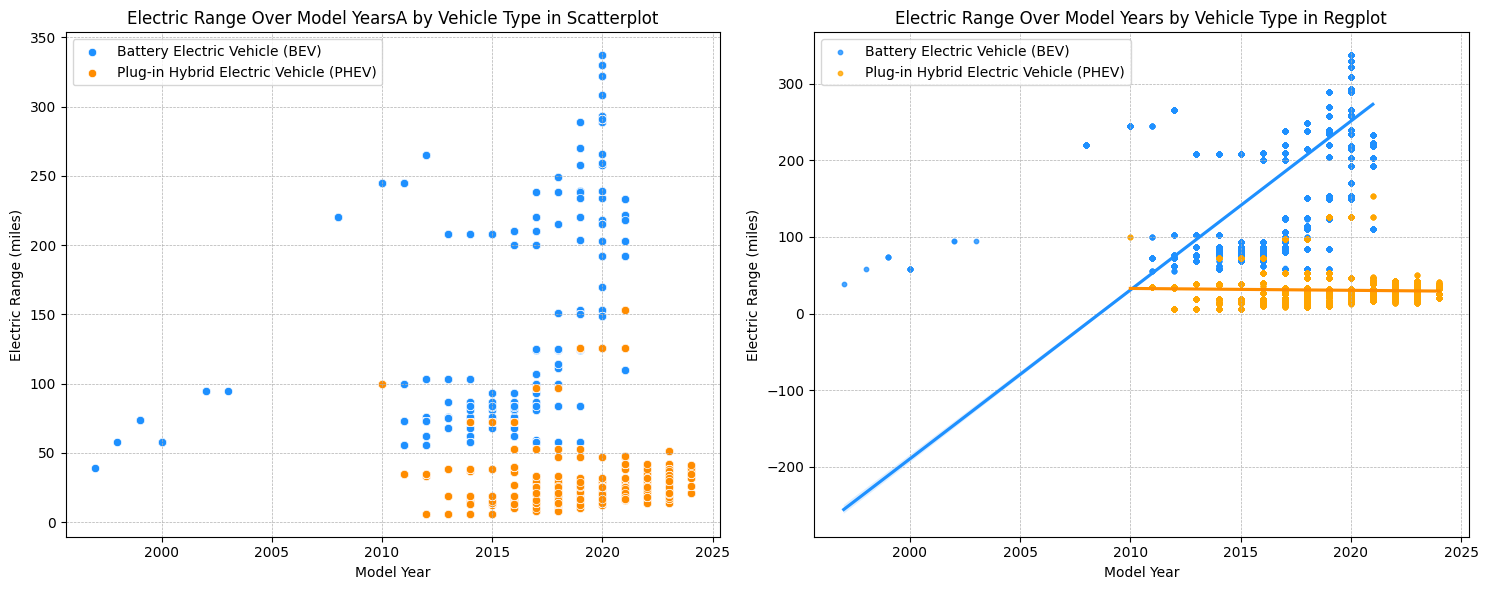

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Model Year', y='Electric Range', data=ev_wa_data[ev_wa_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'], label='Battery Electric Vehicle (BEV)', ax=ax1,color='dodgerblue');
sns.scatterplot(x='Model Year', y='Electric Range', data=ev_wa_data[ev_wa_data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'], label='Plug-in Hybrid Electric Vehicle (PHEV)', ax=ax1,color='darkorange');
ax1.set_title('Electric Range Over Model YearsA by Vehicle Type in Scatterplot')
ax1.set_ylabel('Electric Range (miles)')
ax1.set_xlabel('Model Year')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

sns.regplot(x="Model Year", y="Electric Range",
            data=ev_wa_data[ev_wa_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'],
            label='Battery Electric Vehicle (BEV)',
            scatter_kws={'s':10, 'color':'dodgerblue'},
            line_kws={'color':'dodgerblue'},
            ax=ax2)

sns.regplot(x="Model Year", y="Electric Range",
            data=ev_wa_data[ev_wa_data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'],
            label='Plug-in Hybrid Electric Vehicle (PHEV)',
            scatter_kws={'s':10, 'color':'orange'},
            line_kws={'color':'darkorange'},
            ax=ax2)

ax2.set_title('Electric Range Over Model Years by Vehicle Type in Regplot')
ax2.set_ylabel('Electric Range (miles)')
ax2.set_xlabel('Model Year')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

This code generates a scatter plot visualizing the electric range of vehicles over different model years in Washington (WA). The dataset ev_wa_data is filtered into two categories: 'Battery Electric Vehicle (BEV)' and 'Plug-in Hybrid Electric Vehicle (PHEV)'.
The scatter plot for 'Battery Electric Vehicle (BEV)' vehicles is colored blue.
The scatter plot for 'Plug-in Hybrid Electric Vehicle (PHEV)' vehicles is colored orange.
The x-axis represents the model year, while the y-axis shows the electric range in miles.

Based on the scatter plot provided, we can derive the following insights:

1. Between the years 2000 to 2010, there's a visible upward trend in the maximum electric range, especially for battery electric vehicles (BEVs, represented by blue dots).
2. Battery Electric Vehicles (BEVs, blue dots): Post-2010, their range markedly improved, reaching between 250 to 350 miles.
Plug-in Hybrid Electric Vehicles (PHEVs, orange dots): Despite an increase in their number post-2015, their range predominantly remains below 100 miles.
3. Starting from around 2015, there's a notable increase in the number of data points, possibly indicating a surge in electric vehicle adoption or sales in Washington state.
4. Despite the increasing number of PHEVs in recent years, their electric ranges seem to have not shown significant improvements, with most remaining below 100 miles.
5. Post-2010, there's significant variability in the electric range of BEVs. Some reaching up to almost 350 miles, while others remain considerably lower. This might be due to variations in models, battery technologies, or target markets.

#### Relationship between electric range and CAFV Eligibility as split by EV Type

This led us to wonder if electric ranges would be indicative of Clean Alternative Fuel Eligibility (CAFV), which was also interesting to us as the correlation heat map also showed a high level of correlation between these two variables. Hence, we decided to use a strip plot, split by EV type, to see if there were any insights.

Clean Alternative Fuel Eligibility are grants that fleet vehicle operators (so companies, schools, and basically any organization that is not an individual) with monetary grand awards for any EVs in their fleet. (https://afdc.energy.gov/laws/12516#:~:text=Eligible%20applicants%20must%20be%20a,and%20local%20and%20municipal%20governments)

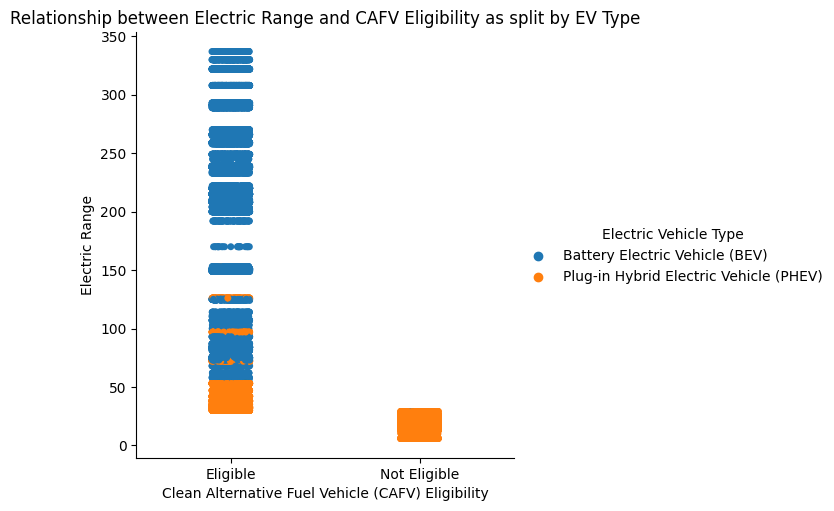

In [ ]:
sns.catplot(x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", y="Electric Range", data=ev_wa_data, hue="Electric Vehicle Type").set_xticklabels(labels=["Eligible", "Not Eligible"])
plt.title("Relationship between Electric Range and CAFV Eligibility as split by EV Type");

Very interestingly, all BEVs were eligible, as were some PHEVs with higher ranges. All of the uneligible cars were PHEVs. For car manufacturers interested in being more appealing to commercial buyers, they would likely have to take this into account and ensure that any EV they produce hits the necessary range requirements to be CAFV eligible, especially if they are producing PHEVs.

## **Conclusion**

From our exploration of this data set, we believe that there is opportunity for the electric vehicle industry to rebound after the COVID-19 pandemic. While Tesla currently is the clear industry leader, other brands are still popular among consumers and can stand to challenge Tesla's monopoly of the market share, especially as more and more people warm up to the idea of electric cars.

While our exploration shows that electric cars remain much more popular in urban centers than in more rural areas, our research also shows that electric ranges are continuing to improve in BEVs. Hence, we are hopeful that rural uptake of BEV technology will correspondingly improve as the cars' electric ranges increase and hence become more reliable for the longer travel distances that rural communities will require.

Legislators can further encourage this trend by offering subsidies, investing in infrastructure, and increasing awareness as needed in their individual districts, especially as different district have different levels of preferences for BEVs and PHEVs. Legislators can also contact existing industry professionals like electrical utility companies who have existing experience with EV infrastructure, like Puget Sound Energy Inc. Existing federeal programs like Clean Alternative Fuel Eligibility also can help increase uptake of EVs in consumers and puts pressure on manufacturers to produce EVs with higher ranges as well.

We see positive signs that manufacturers are seeing the expansion of the EV industry as an opportunity as well, with more and more traditional car manufacturers, including many luxury manufacturers, offering more and more EV options to entice and ease consumers into the industry. Tesla's lead overall lead is likely to be sustained in the near term, but unless they continue their strong performance, innovation, and begin to offer newer models, it seems like competitors are increasingly eyeing the industry and may catch up.

In all, we believe that there is commercial opportunity for automobile brands to continue exploring the EV market. We also believe that there is political opportunity for legislators to reduce their districts' carbon footprint and encourage greener alternatives through policies that promote EVs over traditional gas cars. In doing so, we would collectively be investing positively in our shared communities, shared future, and shared planet.

## **Challenges**

We encountered several challenges in analyzing the data. The dataset predominantly comprised categorical columns, which restricted our ability to create intricate charts and deploy advanced machine learning models. Our analysis would have been more comprehensive and insightful had we possessed data detailing additional attributes of the cars, such as their price and other features. We were also limited on time, which affected the amount of analysis we could do. Being restricted to 15 charts also meant that we had to choose the most relevant pieces of analysis to include only.

## **Citations**

Kapustin, N. O., & Grushevenko, D. A. (2020). Long-term electric vehicles outlook and their potential impact on electric grid. *Energy Policy, 137*, 111103.

Rapson, D. S., & Muehlegger, E. (2023). The economics of electric vehicles. *Review of Environmental Economics and Policy, 17(2)*, 274-294.

Kotek, P., Selei, A., Tóth, B. T., & Felsmann, B. (2023). What can the EU do to address the high natural gas prices?. *Energy Policy, 173*, 113312.

Degirmenci, K., & Breitner, M. H. (2017). Consumer purchase intentions for electric vehicles: Is green more important than price and range?. *Transportation Research Part D: Transport and Environment, 51*, 250-260.

Boranova, V., Huidrom, R., Ozturk, E., Stepanyan, A., Topalova, P., & Zhang, S. F. (2022). *Cars in europe: Supply chains and spillovers during covid-19 times*. International Monetary Fund.